In this notebook, I will perform some modeling based

## Preparing the Model

In [97]:
import pandas as pd
%pylab inline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import (r2_score, mean_absolute_error, accuracy_score,
                             precision_score, recall_score)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


This model considers only categories and location to start out with

In [2]:
df = pd.read_hdf('../data/ready_businesses')

In [3]:
df.columns

Index(['business_id', 'categories', 'city', 'full_address', 'hours',
       'latitude', 'longitude', 'name', 'neighborhoods', 'open',
       'review_count', 'stars', 'state', 'type', 'success_metric',
       'neighbor_success', 'American (New)', 'American (Traditional)',
       'Arts & Entertainment', 'Asian Fusion', 'Bagels', 'Bakeries',
       'Barbeque', 'Bars', 'Breakfast & Brunch', 'British', 'Buffets',
       'Burgers', 'Cafes', 'Canadian (New)', 'Caterers', 'Chicken Wings',
       'Chinese', 'Coffee & Tea', 'Delis', 'Desserts', 'Diners',
       'Event Planning & Services', 'Fast Food', 'Food', 'French',
       'Gastropubs', 'German', 'Gluten-Free', 'Greek', 'Grocery', 'Hawaiian',
       'Hot Dogs', 'Ice Cream & Frozen Yogurt', 'Indian', 'Italian',
       'Japanese', 'Juice Bars & Smoothies', 'Korean', 'Latin American',
       'Lounges', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Nightlife',
       'Pizza', 'Pubs', 'Restaurants', 'Salad', 'Sandwiches', 'Seafood',
       'Sout

In [5]:
# add city later
train_columns = ['neighbor_success', 'American (New)', 'American (Traditional)',
       'Arts & Entertainment', 'Asian Fusion', 'Bagels', 'Bakeries',
       'Barbeque', 'Bars', 'Breakfast & Brunch', 'British', 'Buffets',
       'Burgers', 'Cafes', 'Canadian (New)', 'Caterers', 'Chicken Wings',
       'Chinese', 'Coffee & Tea', 'Delis', 'Desserts', 'Diners',
       'Event Planning & Services', 'Fast Food', 'Food', 'French',
       'Gastropubs', 'German', 'Gluten-Free', 'Greek', 'Grocery', 'Hawaiian',
       'Hot Dogs', 'Ice Cream & Frozen Yogurt', 'Indian', 'Italian',
       'Japanese', 'Juice Bars & Smoothies', 'Korean', 'Latin American',
       'Lounges', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Nightlife',
       'Pizza', 'Pubs', 'Restaurants', 'Salad', 'Sandwiches', 'Seafood',
       'Southern', 'Specialty Food', 'Sports Bars', 'Steakhouses',
       'Sushi Bars', 'Tex-Mex', 'Thai', 'Vegan', 'Vegetarian', 'Vietnamese',
       'Wine Bars']

In [6]:
df.loc[df.success_metric > 16, 'successful'] = 1
df.successful = df.successful.fillna(0)

In [7]:
X = df[train_columns]
y = df.successful

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.15)

In [12]:
len(train_X), len(test_X)

(19329, 3412)

# Classification 

Classification makes more sense. We want to know $P(Successful \mid X)$

In [8]:
from sklearn.svm import SVC

Setting the `class_weight` parameter makes it deal with unbalanced data by Default

In [40]:
clf = SVC(class_weight='balanced')

In [10]:
sum(df.successful) / len(df)

0.25368277560353547

In [44]:
clf.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
svc_predictions = clf.predict(test_X)

In [46]:
accuracy_score(test_y, np.zeros(len(test_y)))

0.76055099648300117

In [48]:
accuracy_score(test_y, svc_predictions)

0.67409144196951931

In [49]:
precision_score(test_y, svc_predictions)

0.3900074571215511

## Random Forests

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfclf = RandomForestClassifier(n_estimators=200, min_samples_split=10, oob_score=True,
                              n_jobs=-1)

In [100]:
rfclf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [114]:
feature_imp = rfclf.feature_importances_

In [119]:
keys = list(train_X.columns)

In [128]:
sorted(list(zip(keys, feature_imp)), key=lambda x: x[1], reverse=True)

[('neighbor_success', 0.50238820833048303),
 ('Fast Food', 0.11038729818909379),
 ('Burgers', 0.051773118697112389),
 ('Sandwiches', 0.036339067563733729),
 ('Chicken Wings', 0.023104472933524533),
 ('American (Traditional)', 0.016800072796280829),
 ('Pizza', 0.013409799807647407),
 ('Mexican', 0.013331903283060753),
 ('Tex-Mex', 0.012458634373197228),
 ('American (New)', 0.012082483167234592),
 ('Food', 0.01030543072270157),
 ('Breakfast & Brunch', 0.0091764809554776786),
 ('Italian', 0.0090868627338094449),
 ('Steakhouses', 0.0084663587630967874),
 ('Seafood', 0.0070989414715790355),
 ('Gluten-Free', 0.0067631993214908011),
 ('Delis', 0.0063569862768165066),
 ('Coffee & Tea', 0.0063152650955736979),
 ('Buffets', 0.0060827366540900677),
 ('Sports Bars', 0.005882929223175788),
 ('Nightlife', 0.0056634500144110336),
 ('Salad', 0.0055271415504110155),
 ('Asian Fusion', 0.0054498513886087211),
 ('Cafes', 0.0053450615632716107),
 ('Vegetarian', 0.0053236739519251031),
 ('Chinese', 0.005223

In [102]:
rf_pred = rfclf.predict(test_X)

In [103]:
rfclf.oob_score_

0.79662683015158575

In [111]:
precision_score(test_y, rf_pred)

0.62222222222222223

In [105]:
accuracy_score(test_y, rf_pred) 

0.79923798358733877

In [106]:
recall_score(test_y, rf_pred)

0.41126070991432068

# Confusion 

In [24]:
from sklearn.metrics import confusion_matrix

In [65]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/Users/Will/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


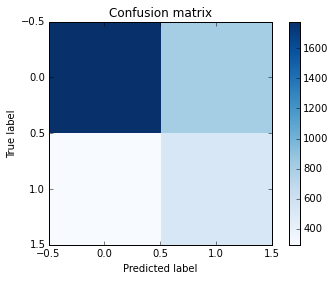

In [66]:
plot_confusion_matrix(confusion_matrix(test_y, svc_predictions))

/Users/Will/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


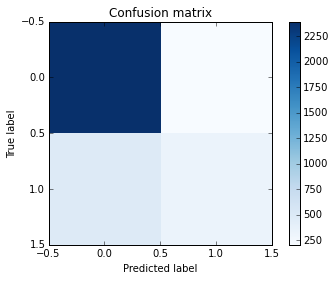

In [110]:
plot_confusion_matrix(confusion_matrix(test_y, rf_pred))

In [112]:
336 / (204 + 336)

0.6222222222222222

In [109]:
confusion_matrix(test_y, rf_pred)

array([[2391,  204],
       [ 481,  336]])

If predicted in top 25%, it will be in the top 25% 61% of the time.

# Extensions

The next iteration of modeling will include features derived from the textual reviews. 